Perform EDA on the data and build a model which will predict whether the person will suffer from Heart-attack or not

**Project Objectives:**
Five million Americans are currently living with heart diseases, and the numbers are expected to rise.It is very important to understand the factors which causes Heart-attacks so that certain precaution can be taken by individuals. In order to understand the reasons of the Heart-attack, a data was collected from various hospitals across US which is given in US. Heart_patients.csv. In the data set there are Heart-Att indicates whether the person suffered from Heart attack or not.

In [79]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt       ##ploting graph
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings('ignore')

In [80]:
df=pd.read_csv("/content/sample_data/US_Heart_Patients_2.csv")

In [81]:
df.head(5)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [82]:
df.tail(5)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
4235,Female,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,Female,39.0,3.0,1.0,30.0,0.0,0.0,0.0,0.0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [83]:
print("No of rows: ",df.shape[0], "\n""No. of columns: ",df.shape[1])

No of rows:  4240 
No. of columns:  16


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [85]:
for column in df.columns:
    print(column.upper(),':',df[column].nunique())
    print()
    print(df[column].value_counts())
    print()

GENDER : 2

Gender
Female    2414
Male      1818
Name: count, dtype: int64

AGE : 39

age
40.0    192
46.0    182
42.0    180
41.0    174
48.0    173
39.0    170
44.0    166
45.0    162
43.0    158
52.0    149
51.0    146
55.0    145
38.0    144
47.0    141
50.0    140
53.0    139
54.0    132
49.0    132
57.0    123
56.0    123
59.0    119
58.0    117
60.0    110
63.0    110
61.0    110
62.0     99
64.0     93
37.0     92
36.0     84
65.0     57
67.0     45
35.0     42
66.0     38
34.0     18
68.0     18
69.0      7
33.0      5
70.0      2
32.0      1
Name: count, dtype: int64

EDUCATION : 4

education
1.0    1717
2.0    1252
3.0     688
4.0     473
Name: count, dtype: int64

CURRENTSMOKER : 2

currentSmoker
0.0    2143
1.0    2094
Name: count, dtype: int64

CIGSPERDAY : 33

cigsPerDay
0.0     2145
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      120
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0     

In [86]:
cat = ["education","currentSmoker","BP Meds","prevalentStroke","prevalentHyp","diabetes"]        ##category var

In [87]:
for i in cat:
    df[i] = df[i].astype('object')        ## change data type make it object

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   object 
 3   currentSmoker    4237 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   object 
 6   prevalentStroke  4231 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


In [89]:
cat = []
num =[]
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


In [90]:
round(df[num].describe(),2).T ##t - transpose

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0
Diastolic BP,4235.0,82.90,11.91,48.00,75.00,82.0,90.00,142.5
BMI,4216.0,25.80,4.08,15.54,23.07,25.4,28.04,56.8
heartRate,4236.0,75.87,12.00,44.00,68.00,75.0,83.00,143.0
glucose,3849.0,81.95,23.96,40.00,71.00,78.0,87.00,394.0
Heart-Att,4240.0,0.15,0.36,0.00,0.00,0.0,0.00,1.0


In [91]:
df[cat].describe().T

,count,unique,top,freq
Gender,4232,2,Female,2414
education,4130.0,4.0,1.0,1717.0
currentSmoker,4237.0,2.0,0.0,2143.0
BP Meds,4180.0,2.0,0.0,4056.0
prevalentStroke,4231.0,2.0,0.0,4206.0
prevalentHyp,4238.0,2.0,0.0,2922.0
diabetes,4238.0,2.0,0.0,4129.0


In [92]:
## Unique values for categorical variables

In [93]:
for column in df.columns:
    print(column.upper(),':',df[column].nunique())
    print()
    print(df[column].value_counts())
    print()

GENDER : 2

Gender
Female    2414
Male      1818
Name: count, dtype: int64

AGE : 39

age
40.0    192
46.0    182
42.0    180
41.0    174
48.0    173
39.0    170
44.0    166
45.0    162
43.0    158
52.0    149
51.0    146
55.0    145
38.0    144
47.0    141
50.0    140
53.0    139
54.0    132
49.0    132
57.0    123
56.0    123
59.0    119
58.0    117
60.0    110
63.0    110
61.0    110
62.0     99
64.0     93
37.0     92
36.0     84
65.0     57
67.0     45
35.0     42
66.0     38
34.0     18
68.0     18
69.0      7
33.0      5
70.0      2
32.0      1
Name: count, dtype: int64

EDUCATION : 4

education
1.0    1717
2.0    1252
3.0     688
4.0     473
Name: count, dtype: int64

CURRENTSMOKER : 2

currentSmoker
0.0    2143
1.0    2094
Name: count, dtype: int64

CIGSPERDAY : 33

cigsPerDay
0.0     2145
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      120
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0     

In [94]:
##Null value Analysis and treatment

In [95]:
round(df.isnull().sum()*100 / df.shape[0],2).sort_values()  ## divide by no.of rows (kitna % null hai)

,0
Heart-Att,0.00
age,0.05
prevalentHyp,0.05
diabetes,0.05
currentSmoker,0.07
Systolic BP,0.09
heartRate,0.09
Diastolic BP,0.12
Gender,0.19
prevalentStroke,0.21


## Handling Duplication

In [96]:
df.duplicated().sum()    ## No duplicate ,all unique

0

In [97]:
## Nul values Imputation for Categorical Variable

In [98]:
df.Gender = df.Gender.fillna("Female")

In [99]:
df.Gender.isnull().sum()

0

In [100]:
df.rename(columns = {"BP Meds":"BPMeds","tot cholestrol":"tot_cholestrol","Systolic BP":"Systolic_BP","Diastolic BP":"Diastolic_BP"},inplace = True)

In [101]:
df_mean = df.copy()
df_median = df.copy()
df_knn = df.copy()

In [102]:
for column in ['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  df_mean[column].fillna(df_mean[column].mode()[0],inplace = True)      #replace with mode
  df_median[column].fillna(df_median[column].mode()[0],inplace = True)

In [103]:
df_mean.isnull().sum()

,0
Gender,0
age,2
education,0
currentSmoker,0
cigsPerDay,31
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
tot cholesterol,60


In [104]:
df_knn['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace =True)

In [105]:
df.isnull().sum()

,0
Gender,0
age,2
education,110
currentSmoker,3
cigsPerDay,31
BPMeds,60
prevalentStroke,9
prevalentHyp,2
diabetes,2
tot cholesterol,60


for column in df_mean.columns:
  if df_mean[column].dtype == 'object':
    mean = df_mean[column].median()

    df_mean[column] = df_mean[column].fillna(mean)

In [106]:
for column in df_mean.columns:
  if df_mean[column].dtype == 'object':
    # Check if the column is 'Gender' and replace values if needed
    if column == 'Gender':
      df_mean['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace=True)
    # Now calculate the median (or mode if more appropriate for categorical data)
    mean = df_mean[column].median()
    df_mean[column] = df_mean[column].fillna(mean)

In [107]:
for column in df_median.columns:
  if df_median[column].dtype == 'object':
    # Use mode instead of median for categorical variables
    mode_value = df_median[column].mode()[0]
    df_median[column] = df_median[column].fillna(mode_value)

In [108]:
## Numerical Variables Treatment

In [109]:
df_mean = df.copy()
df_median = df.copy()

In [110]:
df.rename(columns = {"BP Meds":"BPMeds","tot cholestrol":"tot_cholestrol","Systolic BP":"Systolic_BP","Diastolic BP":"Diastolic_BP"},inplace = True)

In [111]:
# Update the 'num' list with the correct column names after renaming
num = [col for col in df_mean.columns if df_mean[col].dtype != 'object']

# Now, proceed with the imputation
for i in num:
  df_mean[i].fillna(df_mean[i].mean(),inplace = True)

In [112]:
df_mean.isnull().sum()

,0
Gender,0
age,0
education,110
currentSmoker,3
cigsPerDay,0
BPMeds,60
prevalentStroke,9
prevalentHyp,2
diabetes,2
tot cholesterol,0


In [113]:
df_median.isnull().sum()

,0
Gender,0
age,2
education,110
currentSmoker,3
cigsPerDay,31
BPMeds,60
prevalentStroke,9
prevalentHyp,2
diabetes,2
tot cholesterol,60


In [114]:
for i in num:
  df_median[i].fillna(df_median[i].median(),inplace = True)

In [115]:
df_knn = df.copy()

In [116]:
df_mean.isnull().sum()

,0
Gender,0
age,0
education,110
currentSmoker,3
cigsPerDay,0
BPMeds,60
prevalentStroke,9
prevalentHyp,2
diabetes,2
tot cholesterol,0


In [117]:
df_knn

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [118]:
cat

['Gender',
 'education',
 'currentSmoker',
 'BP Meds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes']

In [119]:
cat= ['Gender','education','currentSmoker','BPMeds','tot_cholestrol','Systolic_BP','Diastolic_BP']

In [120]:
## KNN Imputation

# Convert 'Gender' column to numerical before imputation
df_knn['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace =True)

# Now proceed with KNN imputation
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(data = df_imputed, columns = df_knn.columns)

In [121]:
cat= ['Gender','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'] # Correct categorical columns

# Ensure df_knn has the correct column names after KNN imputation
df_knn = pd.DataFrame(data=df_imputed, columns=df.columns) # Use original df columns

# Now apply get_dummies
df_knn = pd.get_dummies(df_knn, columns=cat, drop_first=True, dtype=float)

In [122]:
df_knn

,age,cigsPerDay,tot cholesterol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,Heart-Att,Gender_1.0,...,education_4.0,currentSmoker_0.4,currentSmoker_1.0,BPMeds_0.2,BPMeds_0.4,BPMeds_0.6,BPMeds_1.0,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0
0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,46.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,46.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,48.0,20.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4236,44.0,15.0,210.0,126.5,87.0,19.16,86.0,78.4,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4237,52.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4238,40.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


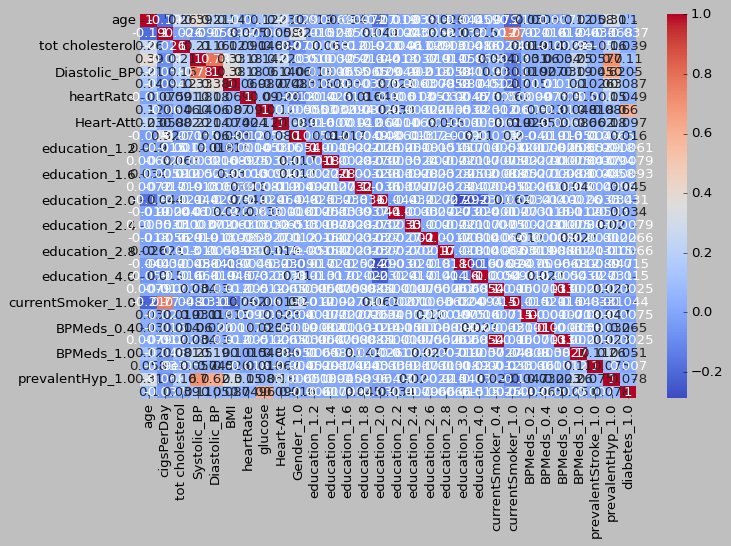

In [123]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_knn.corr(), annot=True, cmap='coolwarm')

plt.show()

In [124]:
df_knn.corr()    ## corelation

,age,cigsPerDay,tot cholesterol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,Heart-Att,Gender_1.0,...,education_4.0,currentSmoker_0.4,currentSmoker_1.0,BPMeds_0.2,BPMeds_0.4,BPMeds_0.6,BPMeds_1.0,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0
age,1.000000,-0.192441,0.263230,0.394138,0.205446,0.136905,-0.011244,0.122982,0.225634,-0.029467,...,-0.058906,0.007921,-0.213532,0.029525,0.030213,0.007921,0.121032,0.057689,0.306658,0.101332
cigsPerDay,-0.192441,1.000000,-0.026384,-0.089584,-0.057505,-0.093666,0.074774,-0.059608,0.057730,0.315214,...,0.014806,-0.011630,0.766174,-0.021121,-0.016449,-0.011630,-0.045542,-0.032646,-0.067608,-0.036954
tot cholesterol,0.263230,-0.026384,1.000000,0.209066,0.164457,0.116722,0.090706,0.045642,0.081997,-0.070888,...,-0.016221,-0.002323,-0.047649,0.018904,0.014101,-0.002323,0.080678,0.000090,0.163800,0.038920
Systolic_BP,0.394138,-0.089584,0.209066,1.000000,0.784070,0.326453,0.183343,0.138794,0.216322,-0.034740,...,-0.068227,0.033567,-0.130414,0.030655,0.059804,0.033567,0.251478,0.056993,0.696549,0.111647
Diastolic_BP,0.205446,-0.057505,0.164457,0.784070,1.000000,0.377638,0.181136,0.060483,0.144898,0.060089,...,-0.019499,0.030440,-0.107895,0.018897,0.027092,0.030440,0.192248,0.045150,0.616039,0.049902
BMI,0.136905,-0.093666,0.116722,0.326453,0.377638,1.000000,0.068546,0.087013,0.074120,0.082934,...,-0.044986,0.011795,-0.166604,0.014698,0.009951,0.011795,0.100310,0.025932,0.300975,0.086722
heartRate,-0.011244,0.074774,0.090706,0.183343,0.181136,0.068546,1.000000,0.089573,0.023967,-0.116390,...,-0.073171,-0.004958,0.062057,0.009892,0.007477,-0.004958,0.015274,-0.017671,0.147754,0.049198
glucose,0.122982,-0.059608,0.045642,0.138794,0.060483,0.087013,0.089573,1.000000,0.121030,0.005503,...,-0.023050,-0.011907,-0.059532,0.004967,0.022907,-0.011907,0.048311,0.017706,0.085679,0.601925
Heart-Att,0.225634,0.057730,0.081997,0.216322,0.144898,0.074120,0.023967,0.121030,1.000000,0.088789,...,-0.003846,-0.006500,0.019448,0.023316,0.051334,-0.006500,0.086448,0.061823,0.177458,0.097344
Gender_1.0,-0.029467,0.315214,-0.070888,-0.034740,0.060089,0.082934,-0.116390,0.005503,0.088789,1.000000,...,0.110791,-0.013307,0.196088,-0.039959,-0.018821,-0.013307,-0.051385,-0.004478,0.006493,0.015850


In [125]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4240 non-null   float64
 1   cigsPerDay           4240 non-null   float64
 2   tot cholesterol      4240 non-null   float64
 3   Systolic_BP          4240 non-null   float64
 4   Diastolic_BP         4240 non-null   float64
 5   BMI                  4240 non-null   float64
 6   heartRate            4240 non-null   float64
 7   glucose              4240 non-null   float64
 8   Heart-Att            4240 non-null   float64
 9   Gender_1.0           4240 non-null   float64
 10  education_1.2        4240 non-null   float64
 11  education_1.4        4240 non-null   float64
 12  education_1.6        4240 non-null   float64
 13  education_1.8        4240 non-null   float64
 14  education_2.0        4240 non-null   float64
 15  education_2.2        4240 non-null   f

In [126]:
## Univariate and Bivariate Analysis

df_mean['Gender'].replace(to_replace = ['Male','Female'],value=[1,0],inplace=True)

In [127]:
df_median['Gender'].replace(to_replace = ['Male','Female'],value=[1,0],inplace=True)

In [128]:
## Mean Dataset

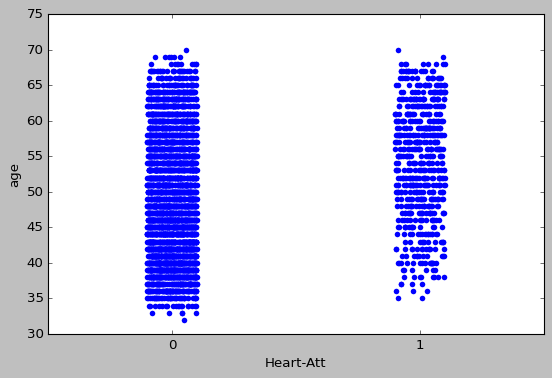

In [129]:
plt.figure(figsize=(8,5))
sns.stripplot(x=df_mean["Heart-Att"], y=df['age'], jitter=True) # Pass x and y as keyword arguments
plt.show()

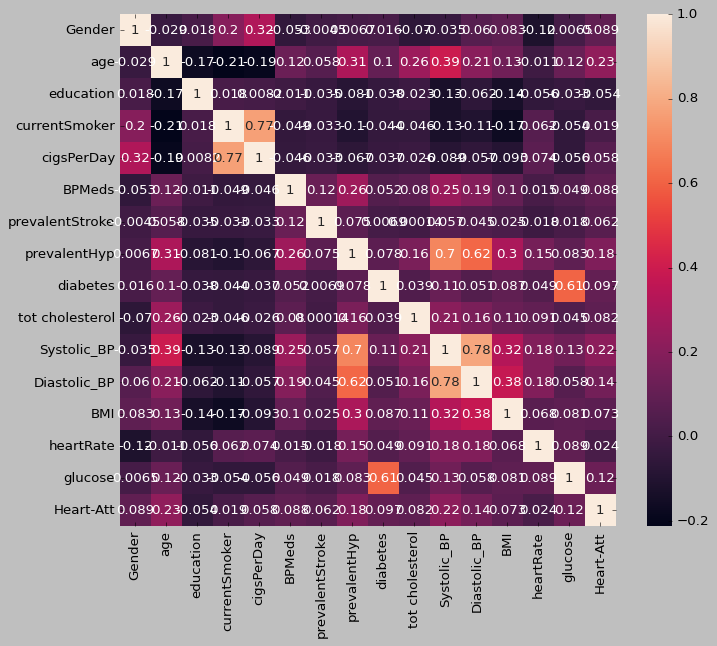

In [130]:
plt.figure(figsize=(10,8))
sns.heatmap(df_mean.corr(),annot=True)       ## correlation plot
plt.show()

In [131]:
df_mean.drop(['currentSmoker','Diastolic_BP'],axis=1,inplace=True)

In [132]:
df_mean

,Gender,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic_BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.000000,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.000000,0
2,1,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.000000,0
3,0,61.0,3.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,28.58,65.0,103.000000,1
4,0,46.0,3.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48.0,2.0,20.0,NaN,0.0,0.0,0.0,248.0,131.0,22.00,84.0,86.000000,0
4236,0,44.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,19.16,86.0,81.951936,0
4237,0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,21.47,80.0,107.000000,0
4238,1,40.0,3.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,25.60,67.0,72.000000,0


In [133]:
## Outlier Treatment

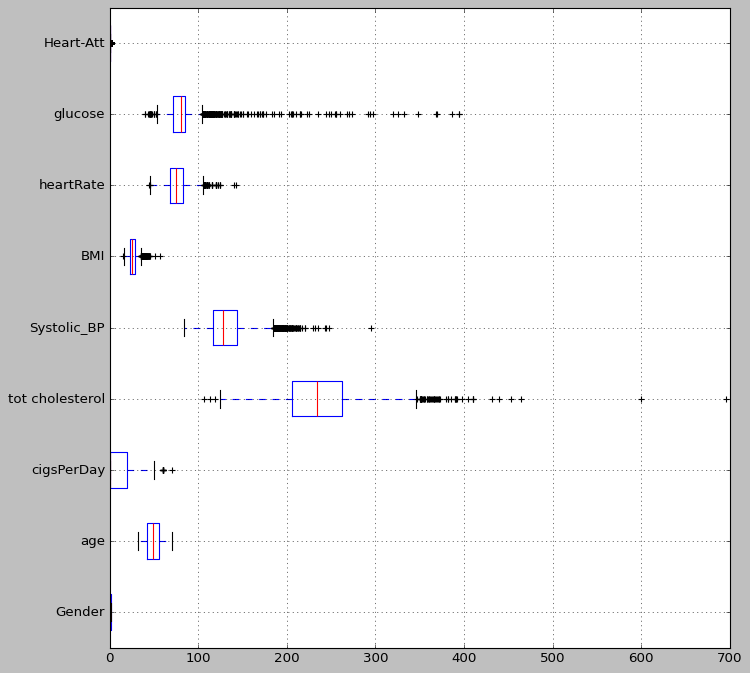

In [134]:
plt.figure(figsize=(10,10))
df_mean.boxplot(vert=False)
plt.show()

In [135]:
df_mean_o = df_mean.copy()

In [136]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = np.quantile([25,75])
  IQR = Q3-Q1
  lower_range = Q1 - (1.5*IQR)
  upper_range = Q3 + (1.5*IQR)
  return lower_range,upper_range

In [137]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = np.quantile(col, [0.25,0.75]) # Pass col as the first argument and quantile values in a list
  IQR = Q3-Q1
  lower_range = Q1 - (1.5*IQR)
  upper_range = Q3 + (1.5*IQR)
  return lower_range,upper_range

In [138]:
## Scaling

In [139]:
df_mean_o = df_mean_o.drop(['BPMeds','prevalentStroke','diabetes'],axis=1).apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) if x.dtype in [np.int64, np.float64] else x)

In [140]:
df_mean =df_mean.apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [141]:
df_mean_o

,Gender,age,education,cigsPerDay,prevalentHyp,tot cholesterol,Systolic_BP,BMI,heartRate,glucose,Heart-Att
0,1.0,0.184211,4.0,0.000000,0.0,0.149406,0.106383,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,2.0,0.000000,0.0,0.242784,0.177305,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,1.0,0.285714,0.0,0.234295,0.208038,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,3.0,0.428571,1.0,0.200340,0.314421,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,3.0,0.328571,0.0,0.302207,0.219858,0.183228,0.414141,0.127119,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,0.421053,2.0,0.285714,0.0,0.239389,0.224586,0.156568,0.404040,0.129944,0.0
4236,0.0,0.315789,1.0,0.214286,0.0,0.174873,0.203310,0.087736,0.424242,0.118508,0.0
4237,0.0,0.526316,2.0,0.000000,0.0,0.275042,0.236407,0.143723,0.363636,0.189266,0.0
4238,1.0,0.210526,3.0,0.000000,1.0,0.132428,0.271868,0.243820,0.232323,0.090395,0.0


In [142]:
## Standard Scaler

In [143]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_mean_o = pd.DataFrame(scalar.fit_transform(df_mean_o),columns=df_mean_o.columns)
df_mean_o

,Gender,age,education,cigsPerDay,prevalentHyp,tot cholesterol,Systolic_BP,BMI,heartRate,glucose,Heart-Att
0,1.154224,-1.234478,1.980838,-0.758012,-0.671101,-0.940924,-1.196862,0.288215,0.344568,-2.169612e-01,-0.423188
1,-0.866383,-0.417660,0.019706,-0.758012,-0.671101,0.300780,-0.515856,0.721369,1.595359,-2.607746e-01,-0.423188
2,1.154224,-0.184284,-0.960859,0.926103,-0.671101,0.187897,-0.220753,-0.112944,-0.072362,-5.236551e-01,-0.423188
3,-0.866383,1.332664,1.000272,1.768161,1.490089,-0.263631,0.800755,0.684453,-0.906223,9.221875e-01,2.363017
4,-0.866383,-0.417660,1.000272,1.178721,-0.671101,1.090954,-0.107253,-0.664230,0.761498,1.335461e-01,-0.423188
...,...,...,...,...,...,...,...,...,...,...,...
4235,-0.866383,-0.184284,0.019706,0.926103,-0.671101,0.255627,-0.061852,-0.934951,0.678112,1.773595e-01,-0.423188
4236,-0.866383,-0.651037,-0.960859,0.505074,-0.671101,-0.602277,-0.266154,-1.633904,0.844884,-2.152438e-16,-0.423188
4237,-0.866383,0.282469,0.019706,-0.758012,-0.671101,0.729732,0.051649,-1.065389,0.344568,1.097441e+00,-0.423188
4238,1.154224,-1.117790,1.000272,-0.758012,1.490089,-1.166688,0.392152,-0.048955,-0.739451,-4.360283e-01,-0.423188


Model Building on Mean Data

In [144]:
x = df_mean.drop('Heart-Att',axis=1)
y = df_mean['Heart-Att']  #copy target into the y dataframe(independent var)

In [145]:
#split x and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Naive Bayes

In [146]:
 from sklearn.naive_bayes import GaussianNB
 from sklearn import metrics

In [147]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

# Assuming df_mean is your DataFrame containing the data
x = df_mean.drop('Heart-Att', axis=1)
y = df_mean['Heart-Att']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'

# Fit the imputer on the training data and transform both training and testing data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Now you can create and fit your GaussianNB model
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [148]:
#run model only on train data
y_train_predict = NB_model.predict(x_train)

model_score = NB_model.score(x_train, y_train)
print(model_score)  ## accuracy

print()
print(metrics.confusion_matrix(y_train, y_train_predict))
print()            ## confusion matrix
print(metrics.classification_report(y_train, y_train_predict))
### classification report

0.8254716981132075

[[2369  150]
 [ 368   81]]

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      2519
         1.0       0.35      0.18      0.24       449

    accuracy                           0.83      2968
   macro avg       0.61      0.56      0.57      2968
weighted avg       0.79      0.83      0.80      2968



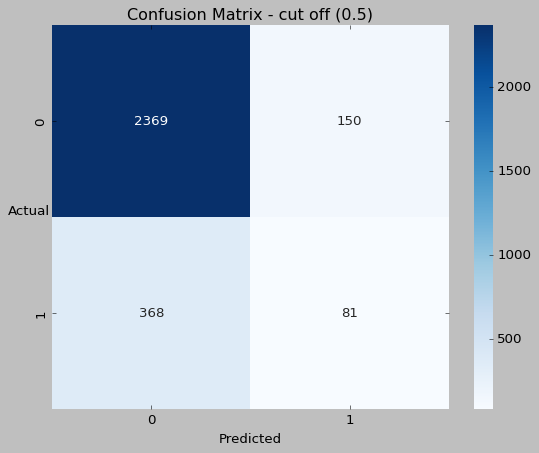

In [149]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues');


plt.xlabel('Predicted');
plt.ylabel('Actual',rotation=0);
plt.title('Confusion Matrix - cut off (0.5)');
plt.show()

In [150]:
print(metrics.classification_report(y_train_predict,y_train))    ## for 1 it fail accuracy

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90      2737
         1.0       0.18      0.35      0.24       231

    accuracy                           0.83      2968
   macro avg       0.56      0.61      0.57      2968
weighted avg       0.88      0.83      0.85      2968



In [151]:
## on test data
y_test_predict = NB_model.predict(x_test)

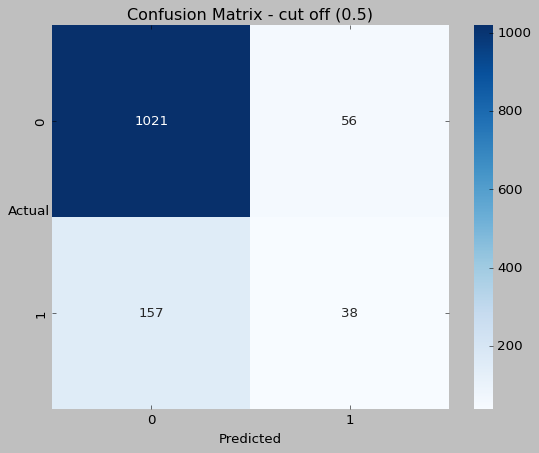

In [152]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues');


plt.xlabel('Predicted');
plt.ylabel('Actual',rotation=0);
plt.title('Confusion Matrix - cut off (0.5)');
plt.show()

In [153]:
print(metrics.classification_report(y_test_predict,y_test)) ## for 1 is also fail

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91      1178
         1.0       0.19      0.40      0.26        94

    accuracy                           0.83      1272
   macro avg       0.57      0.64      0.58      1272
weighted avg       0.89      0.83      0.86      1272



Decision Tree

In [154]:
from sklearn import tree

DT_model = tree.DecisionTreeClassifier()
DT_model.fit(x_train,y_train)

DecisionTreeClassifier()

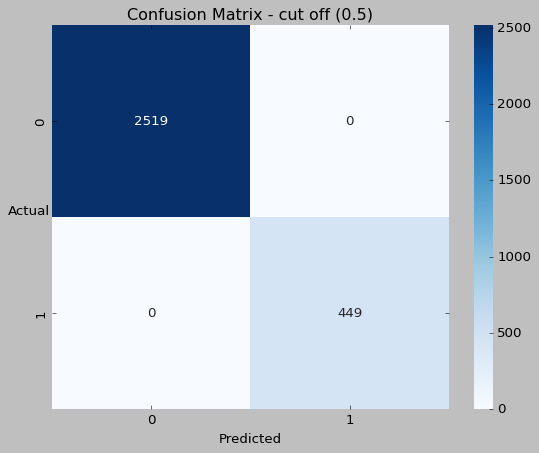

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2519
         1.0       1.00      1.00      1.00       449

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



In [155]:
y_train_predict = DT_model.predict(x_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues');


plt.xlabel('Predicted');
plt.ylabel('Actual',rotation=0);
plt.title('Confusion Matrix - cut off (0.5)');
plt.show()

print(metrics.classification_report(y_train_predict,y_train))

100 % accuracy on train data on above model ⬆⬆⬆

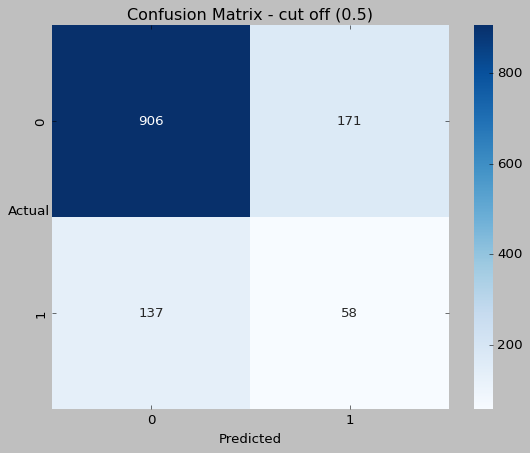

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85      1043
         1.0       0.30      0.25      0.27       229

    accuracy                           0.76      1272
   macro avg       0.57      0.56      0.56      1272
weighted avg       0.74      0.76      0.75      1272



In [156]:
y_test_predict = DT_model.predict(x_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues');


plt.xlabel('Predicted');
plt.ylabel('Actual',rotation=0);
plt.title('Confusion Matrix - cut off (0.5)');
plt.show()

print(metrics.classification_report(y_test_predict,y_test))

In test data model again failed. Model is overfit.


# **Model Comparision**

#Random Forest Model

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2519
         1.0       1.00      1.00      1.00       449

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



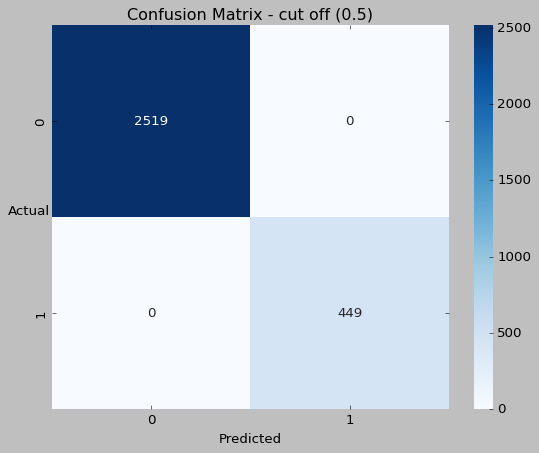

In [158]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100,random_state=1) ## model define
RF_model.fit(x_train,y_train)

## train data performance
y_train_predict = RF_model.predict(x_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actual',rotation=0);
plt.title('Confusion Matrix - cut off (0.5)');

print(metrics.classification_report(y_train_predict,y_train))


              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92      1247
         1.0       0.06      0.48      0.11        25

    accuracy                           0.85      1272
   macro avg       0.52      0.67      0.51      1272
weighted avg       0.97      0.85      0.90      1272



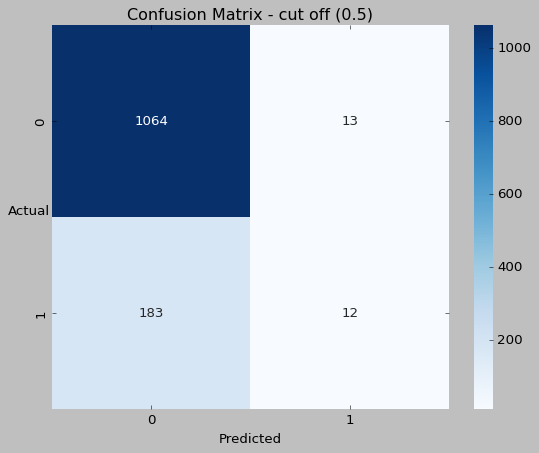

In [159]:
## test data performance
y_test_predict = RF_model.predict(x_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actual',rotation=0);
plt.title('Confusion Matrix - cut off (0.5)');

print(metrics.classification_report(y_test_predict,y_test))

# Ada Boost

In [160]:
from sklearn.ensemble import AdaBoostClassifier

AB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
AB_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      2938
         1.0       0.05      0.70      0.09        30

    accuracy                           0.85      2968
   macro avg       0.52      0.78      0.50      2968
weighted avg       0.99      0.85      0.91      2968



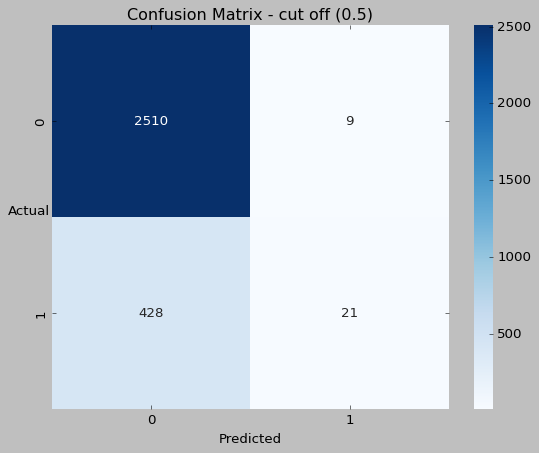

In [161]:
## train data performance

y_train_predict = AB_model.predict(x_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actual',rotation=0);
plt.title('Confusion Matrix - cut off (0.5)');

print(metrics.classification_report(y_train_predict,y_train))


              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92      1256
         1.0       0.05      0.62      0.09        16

    accuracy                           0.85      1272
   macro avg       0.52      0.74      0.51      1272
weighted avg       0.98      0.85      0.91      1272



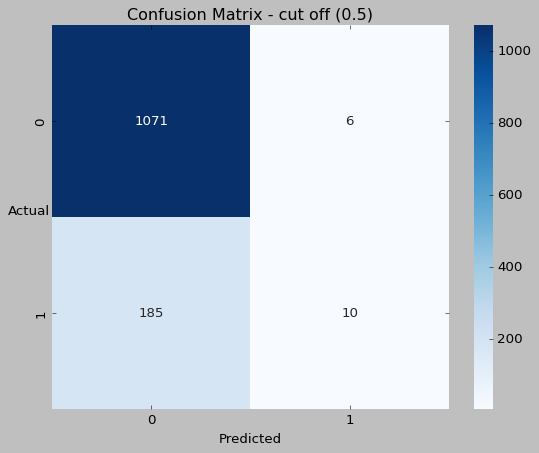

In [162]:
## test data performance
y_test_predict = AB_model.predict(x_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actual',rotation=0);
plt.title('Confusion Matrix - cut off (0.5)');

print(metrics.classification_report(y_test_predict,y_test))

## Gradient Boosting

In [164]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(n_estimators=100,random_state=1)
GB_model = GB_model.fit(x_train,y_train)

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93      2878
         1.0       0.20      0.99      0.33        90

    accuracy                           0.88      2968
   macro avg       0.60      0.93      0.63      2968
weighted avg       0.98      0.88      0.91      2968



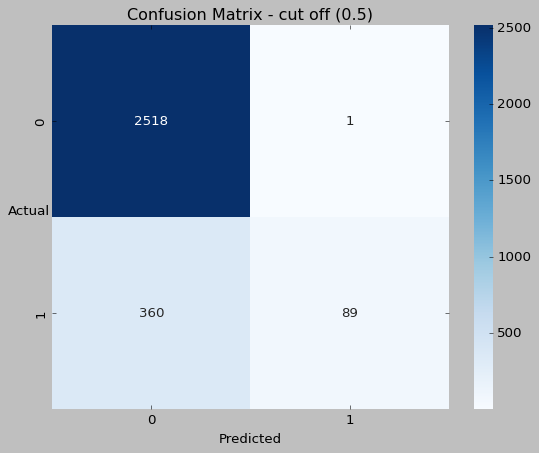

In [165]:
## train data performance

y_train_predict = GB_model.predict(x_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actual',rotation=0);
plt.title('Confusion Matrix - cut off (0.5)');

print(metrics.classification_report(y_train_predict,y_train))


              precision    recall  f1-score   support

         0.0       0.98      0.86      0.91      1237
         1.0       0.08      0.46      0.14        35

    accuracy                           0.84      1272
   macro avg       0.53      0.66      0.53      1272
weighted avg       0.96      0.84      0.89      1272



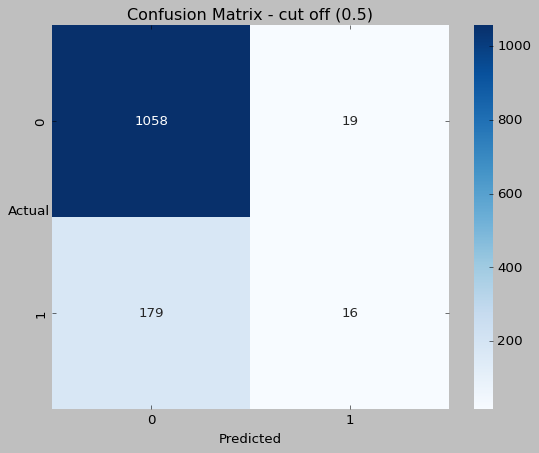

In [166]:
## test data performance
y_test_predict = GB_model.predict(x_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actual',rotation=0);
plt.title('Confusion Matrix - cut off (0.5)');

print(metrics.classification_report(y_test_predict,y_test))

### KNN

In [168]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      2825
         1.0       0.22      0.69      0.33       143

    accuracy                           0.87      2968
   macro avg       0.60      0.78      0.63      2968
weighted avg       0.95      0.87      0.90      2968



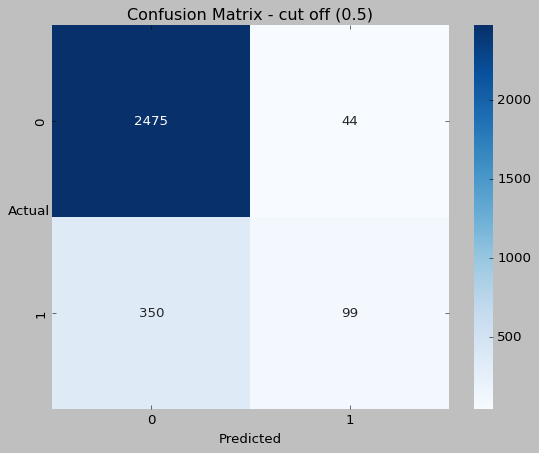

In [169]:
## train data performance

y_train_predict = KNN_model.predict(x_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actual',rotation=0);
plt.title('Confusion Matrix - cut off (0.5)');

print(metrics.classification_report(y_train_predict,y_train))


              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      1223
         1.0       0.09      0.37      0.15        49

    accuracy                           0.84      1272
   macro avg       0.53      0.61      0.53      1272
weighted avg       0.94      0.84      0.88      1272



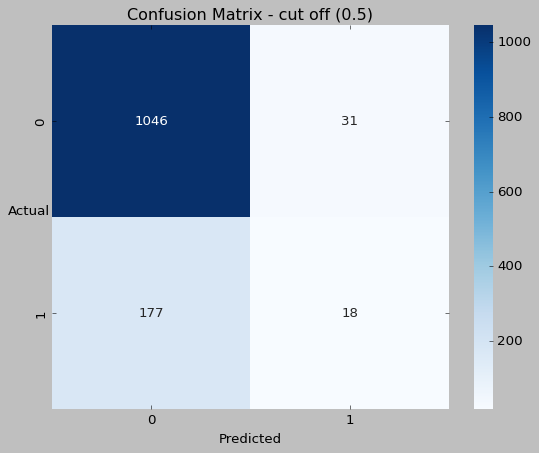

In [170]:
## test data performance
y_test_predict = KNN_model.predict(x_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actual',rotation=0);
plt.title('Confusion Matrix - cut off (0.5)');

print(metrics.classification_report(y_test_predict,y_test))